In [391]:
import pandas as pd
import numpy as np 
import matplotlib as plt
#from openpyxl import load_workbook
#df = pd.read_excel('data/Muesli Project raw data.xlsx')
#wb = load_workbook(filename = 'Column Info')
xls = pd.ExcelFile('data/Muesli_project_data_mod1.xlsx')
df_colum = pd.read_excel(xls, 'Colum Info')
df_orders = pd.read_excel(xls, 'Orders')
df_campaign = pd.read_excel(xls, 'Campaign Data')
df_process = pd.read_excel(xls, 'Order Process Data')
df_intern = pd.read_excel(xls, 'InternData Study')
#main['order_date'] = pd.to_datetime(main['order_date'], format='%d.%m.%Y') code from Peter



In [ ]:
# irrelevant for our analysis - only describing Dataset
print(df_colum.info())


In [431]:
#Columns unnamed need to be adressed 
# Column 2 only contains 5010 values, opposed to 9995 values in the other columns
print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Index           9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Unnamed: 2      5010 non-null   object        
 3   Order Date      9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Origin Channel  9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Category        9994 non-null   object        
 14  Sub-Category    9994 non-null   object        
 15  Prod

In [212]:
df_orders.drop('Unnamed: 2',axis=1, inplace=True)

In [ ]:
#first row is empty, needs to be dropped
#column C, first 2 ines need to be deleted 

df_orders.head(5)

In [ ]:
print(df_campaign.info())

In [215]:
# check if needed convert data to.datetime ??? maybe info says otherwise
df_campaign.head()

,Order ID,Arrival Scan Date,Customer Name
0,CA-2019-100041,2019-12-02,Barbara Fisher
1,CA-2019-100083,2019-12-09,Carol Darley
2,CA-2019-100244,2019-09-30,Greg Maxwell
3,CA-2019-100468,2019-12-09,Alyssa Tate
4,CA-2019-100510,2019-05-28,Harry Marie


In [216]:
print(df_process.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Row ID              5899 non-null   int64         
 1   Order ID            5899 non-null   object        
 2   Order Date          5899 non-null   datetime64[ns]
 3   On Truck Scan Date  5899 non-null   datetime64[ns]
 4   Ship Mode           5899 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 230.6+ KB
None


In [217]:
df_process.drop('Row ID',axis=1, inplace=True)


In [218]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            5899 non-null   object        
 1   Order Date          5899 non-null   datetime64[ns]
 2   On Truck Scan Date  5899 non-null   datetime64[ns]
 3   Ship Mode           5899 non-null   object        
dtypes: datetime64[ns](2), object(2)
memory usage: 184.5+ KB


In [219]:
# check if needed convert data to.datetime ??? maybe info says otherwise
df_process.head()

,Order ID,Order Date,On Truck Scan Date,Ship Mode
0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [220]:
print(df_intern.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            290 non-null    object        
 1   Ready to Ship Date  290 non-null    datetime64[ns]
 2   Pickup Date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB
None


In [221]:
df_intern.head()

,Order ID,Ready to Ship Date,Pickup Date
0,CA-2019-100244,2019-09-24,2019-09-25
1,CA-2019-100244,2019-09-24,2019-09-25
2,CA-2019-100244,2019-09-24,2019-09-25
3,CA-2019-100244,2019-09-24,2019-09-25
4,CA-2019-100244,2019-09-24,2019-09-25


In [222]:
uni_ord = df_orders['Order ID'].unique()
print(uni_ord)

['CA-2019-121755' 'CA-2019-118255' 'CA-2019-169194' ... 'CA-2020-107209'
 'US-2020-152842' 'CA-2019-122581']


In [223]:
uni_grp = df_orders.groupby('Order ID').count()
print(uni_grp)

                Index  Order Date  Ship Mode  Customer ID  Customer Name  \
Order ID                                                                   
CA-2017-100006      1           1          1            1              1   
CA-2017-100090      2           2          2            2              2   
CA-2017-100293      1           1          1            1              1   
CA-2017-100328      1           1          1            1              1   
CA-2017-100363      2           2          2            2              2   
...               ...         ...        ...          ...            ...   
US-2020-168802      1           1          1            1              1   
US-2020-169320      2           2          2            2              2   
US-2020-169488      2           2          2            2              2   
US-2020-169502      2           2          2            2              2   
US-2020-169551      6           6          6            6              6   

           

In [224]:
merge_df = pd.merge(df_orders, df_campaign,  on='Order ID', how='outer')


In [225]:
supermerge = pd.merge(df_intern, df_process, on ='Order ID', how='outer')
supermerge


,Order ID,Ready to Ship Date,Pickup Date,Order Date,On Truck Scan Date,Ship Mode
0,CA-2019-100244,2019-09-24,2019-09-25,2019-09-20,2019-09-25,Standard Processing
1,CA-2019-100244,2019-09-24,2019-09-25,2019-09-20,2019-09-25,Standard Processing
2,CA-2019-100244,2019-09-24,2019-09-25,2019-09-20,2019-09-25,Standard Processing
3,CA-2019-100244,2019-09-24,2019-09-25,2019-09-20,2019-09-25,Standard Processing
4,CA-2019-100244,2019-09-24,2019-09-25,2019-09-20,2019-09-25,Standard Processing
...,...,...,...,...,...,...
6229,CA-2020-143259,NaT,NaT,2020-12-30,2021-01-06,Standard Processing
6230,CA-2020-143259,NaT,NaT,2020-12-30,2021-01-06,Standard Processing
6231,CA-2020-115427,NaT,NaT,2020-12-30,2021-01-06,Standard Processing
6232,CA-2020-115427,NaT,NaT,2020-12-30,2021-01-06,Standard Processing


In [226]:
ultramerge = pd.merge(merge_df, supermerge, on ='Order ID', how='outer')
ultramerge

,Index,Order ID,Order Date_x,Ship Mode_x,Customer ID,Customer Name_x,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit,Arrival Scan Date,Customer Name_y,Ready to Ship Date,Pickup Date,Order Date_y,On Truck Scan Date,Ship Mode_y
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,NaT,NaN,NaT,NaT,2019-01-16,2019-01-23,Standard Processing
1,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,NaT,NaN,NaT,NaT,2019-01-16,2019-01-23,Standard Processing
2,26,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,NaT,NaN,NaT,NaT,2019-01-16,2019-01-23,Standard Processing
3,26,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,NaT,NaN,NaT,NaT,2019-01-16,2019-01-23,Standard Processing
4,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,NaT,NaN,NaT,NaT,2019-03-11,2019-03-13,Express
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23166,9760,CA-2019-146913,2019-10-31,Standard Class,SF-20965,Sylvia Foulston,Sales,United States,San Francisco,California,94109.0,West,Toasted Muesli,With Nuts,FUR-CH-10001854,1403.920,5,0.2,70.1960,2019-11-11,Sylvia Foulston,NaT,NaT,2019-10-31,2019-11-06,Standard Processing
23167,9787,US-2017-114377,2017-11-05,First Class,BG-11035,Barry Gonzalez,Email,United States,Hampton,Virginia,23666.0,South,Toasted Muesli,With Nuts,FUR-CH-10004754,149.900,5,0.0,40.4730,NaT,NaN,NaT,NaT,NaT,NaT,NaN
23168,9808,CA-2020-107209,2020-07-27,Second Class,JW-15955,Joni Wasserman,Email,United States,Raleigh,North Carolina,27604.0,South,Toasted Muesli,With Nuts,FUR-CH-10001146,194.848,4,0.2,12.1780,NaT,NaN,NaT,NaT,2020-07-27,2020-08-05,Standard Processing
23169,9830,US-2020-152842,2020-07-16,Standard Class,NF-18385,Natalie Fritzler,Email,United States,Charlotte,North Carolina,28205.0,South,Toasted Muesli,With Nuts,FUR-CH-10004218,242.352,3,0.2,15.1470,NaT,NaN,NaT,NaT,2020-07-16,2020-07-24,Standard Processing


In [227]:
ultramerge = ultramerge.replace(" ","_")
ultramerge.drop('Index', axis=1, inplace=True)
ultramerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23171 entries, 0 to 23170
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            23171 non-null  object        
 1   Order Date_x        23171 non-null  datetime64[ns]
 2   Ship Mode_x         23171 non-null  object        
 3   Customer ID         23171 non-null  object        
 4   Customer Name_x     23171 non-null  object        
 5   Origin Channel      23171 non-null  object        
 6   Country/Region      23171 non-null  object        
 7   City                23171 non-null  object        
 8   State               23171 non-null  object        
 9   Postal Code         23142 non-null  float64       
 10  Region              23171 non-null  object        
 11  Category            23171 non-null  object        
 12  Sub-Category        23171 non-null  object        
 13  Product ID          23171 non-null  object    

In [228]:
with pd.ExcelWriter("data/ultamerge.xlsx") as writer:
    ultramerge.to_excel(writer)  

In [229]:
# identify duplicates
ultramerge[ultramerge.duplicated(keep=False)].sort_values(by=['Order ID']).head(100)

,Order ID,Order Date_x,Ship Mode_x,Customer ID,Customer Name_x,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit,Arrival Scan Date,Customer Name_y,Ready to Ship Date,Pickup Date,Order Date_y,On Truck Scan Date,Ship Mode_y
15202,CA-2019-100041,2019-11-20,Standard Class,BF-10975,Barbara Fisher,Sales,United States,Columbus,Indiana,47201.0,Central,Power Muesli,Nuts and more,OFF-PA-10001622,9.08,2,0.0,4.0860,2019-12-02,Barbara Fisher,NaT,NaT,2019-11-20,2019-11-27,Standard Processing
15200,CA-2019-100041,2019-11-20,Standard Class,BF-10975,Barbara Fisher,Sales,United States,Columbus,Indiana,47201.0,Central,Power Muesli,Nuts and more,OFF-PA-10001622,9.08,2,0.0,4.0860,2019-12-02,Barbara Fisher,NaT,NaT,2019-11-20,2019-11-27,Standard Processing
15201,CA-2019-100041,2019-11-20,Standard Class,BF-10975,Barbara Fisher,Sales,United States,Columbus,Indiana,47201.0,Central,Power Muesli,Nuts and more,OFF-PA-10001622,9.08,2,0.0,4.0860,2019-12-02,Barbara Fisher,NaT,NaT,2019-11-20,2019-11-27,Standard Processing
15208,CA-2019-100041,2019-11-20,Standard Class,BF-10975,Barbara Fisher,Sales,United States,Columbus,Indiana,47201.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10000343,4.91,1,0.0,2.3077,2019-12-02,Barbara Fisher,NaT,NaT,2019-11-20,2019-11-27,Standard Processing
15207,CA-2019-100041,2019-11-20,Standard Class,BF-10975,Barbara Fisher,Sales,United States,Columbus,Indiana,47201.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10000343,4.91,1,0.0,2.3077,2019-12-02,Barbara Fisher,NaT,NaT,2019-11-20,2019-11-27,Standard Processing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14641,CA-2019-100244,2019-09-20,Standard Class,GM-14695,Greg Maxwell,Sales,United States,San Francisco,California,94122.0,West,Power Muesli,Nuts and more,OFF-PA-10001471,65.79,9,0.0,30.2634,2019-09-30,Greg Maxwell,2019-09-24,2019-09-25,2019-09-20,2019-09-25,Standard Processing
14642,CA-2019-100244,2019-09-20,Standard Class,GM-14695,Greg Maxwell,Sales,United States,San Francisco,California,94122.0,West,Power Muesli,Nuts and more,OFF-PA-10001471,65.79,9,0.0,30.2634,2019-09-30,Greg Maxwell,2019-09-24,2019-09-25,2019-09-20,2019-09-25,Standard Processing
14643,CA-2019-100244,2019-09-20,Standard Class,GM-14695,Greg Maxwell,Sales,United States,San Francisco,California,94122.0,West,Power Muesli,Nuts and more,OFF-PA-10001471,65.79,9,0.0,30.2634,2019-09-30,Greg Maxwell,2019-09-24,2019-09-25,2019-09-20,2019-09-25,Standard Processing
14644,CA-2019-100244,2019-09-20,Standard Class,GM-14695,Greg Maxwell,Sales,United States,San Francisco,California,94122.0,West,Power Muesli,Nuts and more,OFF-PA-10001471,65.79,9,0.0,30.2634,2019-09-30,Greg Maxwell,2019-09-24,2019-09-25,2019-09-20,2019-09-25,Standard Processing


In [230]:
ultramerge.drop_duplicates(inplace=True)
ultramerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 23170
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            9995 non-null   object        
 1   Order Date_x        9995 non-null   datetime64[ns]
 2   Ship Mode_x         9995 non-null   object        
 3   Customer ID         9995 non-null   object        
 4   Customer Name_x     9995 non-null   object        
 5   Origin Channel      9995 non-null   object        
 6   Country/Region      9995 non-null   object        
 7   City                9995 non-null   object        
 8   State               9995 non-null   object        
 9   Postal Code         9984 non-null   float64       
 10  Region              9995 non-null   object        
 11  Category            9995 non-null   object        
 12  Sub-Category        9995 non-null   object        
 13  Product ID          9995 non-null   object     

In [231]:
# identify duplicates
ultramerge[ultramerge.duplicated(keep=False)].sort_values(by=['Order ID']).head(100)

,Order ID,Order Date_x,Ship Mode_x,Customer ID,Customer Name_x,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit,Arrival Scan Date,Customer Name_y,Ready to Ship Date,Pickup Date,Order Date_y,On Truck Scan Date,Ship Mode_y


In [232]:
ultramerge['Order Date_x'].describe()


/var/folders/hk/4wpr3zv9507gpsy2svphsj3w0000gn/T/ipykernel_10005/248598524.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ultramerge['Order Date_x'].describe()


count                    9995
unique                   1236
top       2019-09-05 00:00:00
freq                       38
first     2017-01-03 00:00:00
last      2020-12-30 00:00:00
Name: Order Date_x, dtype: object

In [233]:
ultramerge.head(5)

,Order ID,Order Date_x,Ship Mode_x,Customer ID,Customer Name_x,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit,Arrival Scan Date,Customer Name_y,Ready to Ship Date,Pickup Date,Order Date_y,On Truck Scan Date,Ship Mode_y
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,NaT,NaN,NaT,NaT,2019-01-16,2019-01-23,Standard Processing
2,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,NaT,NaN,NaT,NaT,2019-01-16,2019-01-23,Standard Processing
4,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,NaT,NaN,NaT,NaT,2019-03-11,2019-03-13,Express
6,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10003291,17.460,2,0.0,8.2062,NaT,NaN,NaT,NaT,2019-03-11,2019-03-13,Express
8,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,NaT,NaN,NaT,NaT,2019-06-20,2019-06-26,Standard Processing


In [234]:
with pd.ExcelWriter("data/ultamerge2.xlsx") as writer:
    ultramerge.to_excel(writer)  

In [235]:
# change date text string to datetime datatype
ultramerge['Order Date_x'] = pd.to_datetime(ultramerge['Order Date_x'])
#ultramerge['tatzeit_ende_datum'] = pd.to_datetime(ultramerge['tatzeit_ende_datum'])

In [236]:
pd.set_option('display.max_columns', None)

In [237]:
ultramerge.head()

,Order ID,Order Date_x,Ship Mode_x,Customer ID,Customer Name_x,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit,Arrival Scan Date,Customer Name_y,Ready to Ship Date,Pickup Date,Order Date_y,On Truck Scan Date,Ship Mode_y
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,NaT,NaN,NaT,NaT,2019-01-16,2019-01-23,Standard Processing
2,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,NaT,NaN,NaT,NaT,2019-01-16,2019-01-23,Standard Processing
4,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,NaT,NaN,NaT,NaT,2019-03-11,2019-03-13,Express
6,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10003291,17.460,2,0.0,8.2062,NaT,NaN,NaT,NaT,2019-03-11,2019-03-13,Express
8,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,NaT,NaN,NaT,NaT,2019-06-20,2019-06-26,Standard Processing


In [238]:
#Drop command column by index  --> use later 
#ultramerge.drop(ultramerge.columns[0], axis=1, inplace=True)
#ultramerge.head()

In [239]:
# unify values for ship mode with ship mode y as reference 
ultramerge['Ship Mode_x'] = ultramerge['Ship Mode_x'].replace(['Second Class'], 'standard_processing')
ultramerge['Ship Mode_x'] = ultramerge['Ship Mode_x'].replace(['Standard Class'], 'standard_processing')
ultramerge['Ship Mode_x'] = ultramerge['Ship Mode_x'].replace(['First Class'], 'express_processing')

In [240]:
ultramerge.head()

,Order ID,Order Date_x,Ship Mode_x,Customer ID,Customer Name_x,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit,Arrival Scan Date,Customer Name_y,Ready to Ship Date,Pickup Date,Order Date_y,On Truck Scan Date,Ship Mode_y
0,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,NaT,NaN,NaT,NaT,2019-01-16,2019-01-23,Standard Processing
2,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,NaT,NaN,NaT,NaT,2019-01-16,2019-01-23,Standard Processing
4,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,NaT,NaN,NaT,NaT,2019-03-11,2019-03-13,Express
6,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10003291,17.460,2,0.0,8.2062,NaT,NaN,NaT,NaT,2019-03-11,2019-03-13,Express
8,CA-2019-169194,2019-06-20,standard_processing,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,NaT,NaN,NaT,NaT,2019-06-20,2019-06-26,Standard Processing


In [241]:
# drop ship mode y -- not needed anymore
ultramerge.drop(columns='Ship Mode_y', inplace=True)


In [242]:
ultramerge.head()

,Order ID,Order Date_x,Ship Mode_x,Customer ID,Customer Name_x,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit,Arrival Scan Date,Customer Name_y,Ready to Ship Date,Pickup Date,Order Date_y,On Truck Scan Date
0,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,NaT,NaN,NaT,NaT,2019-01-16,2019-01-23
2,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,NaT,NaN,NaT,NaT,2019-01-16,2019-01-23
4,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,NaT,NaN,NaT,NaT,2019-03-11,2019-03-13
6,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10003291,17.460,2,0.0,8.2062,NaT,NaN,NaT,NaT,2019-03-11,2019-03-13
8,CA-2019-169194,2019-06-20,standard_processing,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,NaT,NaN,NaT,NaT,2019-06-20,2019-06-26


In [243]:
#check for invalid datatypes
ultramerge['Order Date_x'].head()

0   2019-01-16
2   2019-01-16
4   2019-03-11
6   2019-03-11
8   2019-06-20
Name: Order Date_x, dtype: datetime64[ns]

In [244]:
#lowercase
ultramerge.columns = ultramerge.columns.str.lower()

In [245]:
ultramerge.columns = ultramerge.columns.str.replace(" ", "_")

In [246]:
ultramerge.columns = ultramerge.columns.str.replace(" ", "_")

In [247]:
ultramerge.head()

,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date,customer_name_y,ready_to_ship_date,pickup_date,order_date_y,on_truck_scan_date
0,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,NaT,NaN,NaT,NaT,2019-01-16,2019-01-23
2,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,NaT,NaN,NaT,NaT,2019-01-16,2019-01-23
4,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,NaT,NaN,NaT,NaT,2019-03-11,2019-03-13
6,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10003291,17.460,2,0.0,8.2062,NaT,NaN,NaT,NaT,2019-03-11,2019-03-13
8,CA-2019-169194,2019-06-20,standard_processing,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,NaT,NaN,NaT,NaT,2019-06-20,2019-06-26


In [248]:
# drop order date y -- not needed anymore, dame date in order date x
ultramerge.drop(columns='order_date_y', inplace=True)

In [255]:
ultramerge.rename(columns={"order_date_x": "order_date"}, inplace=True)


In [257]:
ultramerge.rename(columns={"ship_mode_x": "processing"}, inplace=True)

In [259]:
# drop order date y -- not needed anymore, dame date in order date x
ultramerge.drop(columns='customer_name_y', inplace=True)

In [264]:
ultramerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 23170
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            9995 non-null   object        
 1   order_date          9995 non-null   datetime64[ns]
 2   processing          9995 non-null   object        
 3   customer_id         9995 non-null   object        
 4   customer_name_x     9995 non-null   object        
 5   origin_channel      9995 non-null   object        
 6   country/region      9995 non-null   object        
 7   city                9995 non-null   object        
 8   state               9995 non-null   object        
 9   postal_code         9984 non-null   float64       
 10  region              9995 non-null   object        
 11  category            9995 non-null   object        
 12  sub-category        9995 non-null   object        
 13  product_id          9995 non-null   object     

In [265]:
ultramerge.astype({'postal_code': 'int64'}).dtypes

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [289]:
#ultramerge.loc[ultramerge['postal_code'].isin(" ")]
#ultramerge.loc[ultramerge('postal_code').isnull()]

pd.isna(ultramerge['postal_code'])

0        False
2        False
4        False
6        False
8        False
         ...  
23166    False
23167    False
23168    False
23169    False
23170    False
Name: postal_code, Length: 9995, dtype: bool

In [299]:
# Drop rows that has NaN values on selected columns
ultramerge_drop=ultramerge.dropna(subset=['postal_code'], inplace=True)


In [301]:
ultramerge.head()

,order_id,order_date,processing,customer_id,customer_name_x,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date
0,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,NaT,NaT,NaT,2019-01-23
2,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,NaT,NaT,NaT,2019-01-23
4,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,NaT,NaT,NaT,2019-03-13
6,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10003291,17.460,2,0.0,8.2062,NaT,NaT,NaT,2019-03-13
8,CA-2019-169194,2019-06-20,standard_processing,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,NaT,NaT,NaT,2019-06-26


In [302]:
with pd.ExcelWriter("data/ultamerge3.xlsx") as writer:
    ultramerge.to_excel(writer)  

In [306]:
#new column with processing time from order date to 'shipped'
ultramerge['processing_unt_shp'] = ultramerge['on_truck_scan_date'] - ultramerge['order_date']

In [308]:
ultramerge['processing_unt_arrival'] = ultramerge['arrival_scan_date'] - ultramerge['order_date']

In [309]:
ultramerge.head()

,order_id,order_date,processing,customer_id,customer_name_x,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,processing_unt_shp,processing_unt_arrival
0,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,NaT,NaT,NaT,2019-01-23,7 days,NaT
2,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,NaT,NaT,NaT,2019-01-23,7 days,NaT
4,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,NaT,NaT,NaT,2019-03-13,2 days,NaT
6,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10003291,17.460,2,0.0,8.2062,NaT,NaT,NaT,2019-03-13,2 days,NaT
8,CA-2019-169194,2019-06-20,standard_processing,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,NaT,NaT,NaT,2019-06-26,6 days,NaT


In [317]:
#didnt work ultramerge["order_date"] = pd.to_datetime(ultramerge["order_date"], format="%Y-%m-%d")


In [322]:
ultramerge["order_date"] = pd.to_datetime(ultramerge["order_date"].dt.date)

In [324]:

ultramerge["order_weekday"] = ultramerge["order_date"].dt.dayofweek

In [332]:
# Column which weekday 
weekday = {
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'}

ultramerge["order_day"] = ultramerge["order_weekday"].map(weekday)

In [338]:
ultramerge.head()

,order_id,order_date,processing,customer_id,customer_name_x,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,processing_unt_shp,processing_unt_arrival,order_weekday,COGS,order_to_pickup,order_day
0,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,NaT,NaT,NaT,2019-01-23,7 days,NaT,2,78.7959,7 days,Wednesday
2,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,NaT,NaT,NaT,2019-01-23,7 days,NaT,2,7.4256,7 days,Wednesday
4,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,NaT,NaT,NaT,2019-03-13,2 days,NaT,0,26.2086,2 days,Monday
6,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10003291,17.460,2,0.0,8.2062,NaT,NaT,NaT,2019-03-13,2 days,NaT,0,9.2538,2 days,Monday
8,CA-2019-169194,2019-06-20,standard_processing,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,NaT,NaT,NaT,2019-06-26,6 days,NaT,3,40.0500,6 days,Thursday


In [339]:
#adding Cost of goods sold column 
ultramerge['COGS'] = ultramerge['sales'] - ultramerge['profit']

In [340]:
ultramerge['order_to_pickup'] = ultramerge['on_truck_scan_date'] - ultramerge['order_date']

In [ ]:
ultramerge.info()

In [348]:
#order date + 2 tage #ready to ship approx
import datetime 
ultramerge["ready_to_ship_approx"] = ultramerge["order_date"] + datetime.timedelta(days=2)

In [350]:
ultramerge['idle_time_approx'] = ultramerge['on_truck_scan_date'] - ultramerge['ready_to_ship_approx']

In [ ]:
ultramerge.head()

In [ ]:
#ready to ship

In [356]:
#second dataframe with reduced data for arrival scan date/ready to ship date if available 

#smallmerge = pd.merge(df_orders, df_campaign,  on='Order ID', how='outer')
#smallmerge = df_intern.set_index('Order ID').join(df_process.set_index('Order ID'), how='right')
# no time to test, excel ftw

In [359]:
with pd.ExcelWriter("data/ultamerge4.xlsx") as writer:
    ultramerge.to_excel(writer) 

In [361]:
#descriptive Processtime --> order to pickup
# Column processing_unt_shp
ultramerge['processing_unt_shp'].describe()
ultramerge['processing_unt_shp'].mean()


Timedelta('6 days 02:49:36.782077393')

In [362]:
ultramerge['processing_unt_shp'].mode()

0   7 days
Name: processing_unt_shp, dtype: timedelta64[ns]

In [363]:
ultramerge['processing_unt_shp'].describe()

count                         5892
mean     6 days 02:49:36.782077393
std      2 days 12:14:25.071758458
min                0 days 00:00:00
25%                5 days 00:00:00
50%                7 days 00:00:00
75%                8 days 00:00:00
max               12 days 00:00:00
Name: processing_unt_shp, dtype: object

In [367]:
ultramerge['processing_unt_shp'].quantile(0.95)

Timedelta('10 days 00:00:00')

In [ ]:
#Processtime order until pickup 
# Mean = 6 Days
# Mode = 7 Days
#75% quantile --> 8 Days 

In [433]:
ultramerge.head()

,order_id,order_date,processing,customer_id,customer_name_x,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date,ready_to_ship_date,pickup_date,on_truck_scan_date,processing_unt_shp,processing_unt_arrival,order_weekday,COGS,order_to_pickup,order_day,date_1,ready_to_ship_approx,idle_time_approx,time_to_shp_int
0,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,NaT,NaT,NaT,2019-01-23,7 days,NaT,2,78.7959,7 days,Wednesday,2019-01-18,2019-01-18,5 days,7 days
2,CA-2019-121755,2019-01-16,standard_processing,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001634,11.648,2,0.2,4.2224,NaT,NaT,NaT,2019-01-23,7 days,NaT,2,7.4256,7 days,Wednesday,2019-01-18,2019-01-18,5 days,7 days
4,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,NaT,NaT,NaT,2019-03-13,2 days,NaT,0,26.2086,2 days,Monday,2019-03-13,2019-03-13,0 days,2 days
6,CA-2019-118255,2019-03-11,express_processing,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Power Muesli,Super Fibre Boost,OFF-BI-10003291,17.460,2,0.0,8.2062,NaT,NaT,NaT,2019-03-13,2 days,NaT,0,9.2538,2 days,Monday,2019-03-13,2019-03-13,0 days,2 days
8,CA-2019-169194,2019-06-20,standard_processing,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,NaT,NaT,NaT,2019-06-26,6 days,NaT,3,40.0500,6 days,Thursday,2019-06-22,2019-06-22,4 days,6 days


In [434]:
ultramerge['idle_time_approx'].mean()


Timedelta('4 days 02:49:36.782077393')

In [435]:
ultramerge['idle_time_approx'].mode()

0   5 days
Name: idle_time_approx, dtype: timedelta64[ns]

In [436]:
ultramerge['idle_time_approx'].describe()

count                         5892
mean     4 days 02:49:36.782077393
std      2 days 12:14:25.071758458
min              -2 days +00:00:00
25%                3 days 00:00:00
50%                5 days 00:00:00
75%                6 days 00:00:00
max               10 days 00:00:00
Name: idle_time_approx, dtype: object

In [ ]:
# approximated Idle time 
# Mean = 4 Days
# Mode = 5 Days
#75% quantile --> 6 Days 

<AxesSubplot:>

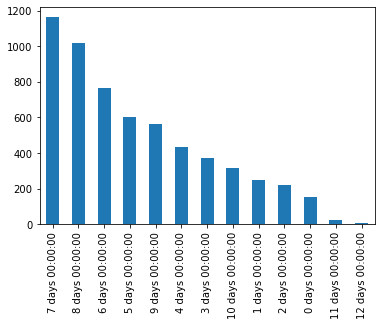

In [457]:
ultramerge['processing_unt_shp'].value_counts().plot(kind="bar")

In [460]:
ultramerge['processing_unt_shp'] = pd.to_datetime(ultramerge['processing_unt_shp'], format='%Y.%d.%m') 

TypeError: dtype timedelta64[ns] cannot be converted to datetime64[ns]